In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score
from imblearn.combine import SMOTEENN


# Carregar os dados
file_path_normal = r'C:\Users\Andre\Downloads\DOUTORADO\focuszerov_2.xlsx'  # Substitua pelo caminho correto
file_path_anomalous = r'C:\Users\Andre\Downloads\DOUTORADO\focuscincov_2.xlsx'  # Substitua pelo caminho correto

# Carregar os dados normais e anômalos
normais = pd.read_excel(file_path_normal)
anomalos = pd.read_excel(file_path_anomalous)

normais = normais.to_numpy()
anomalos = anomalos.to_numpy()

# Pré-processamento de dados
scaler = StandardScaler()

# Ajustar o scaler nos dados normais (apenas treino usa fit_transform)
normais_scaled = scaler.fit_transform(normais)

# Transformar os dados anômalos para o mesmo espaço
anomalos_scaled = scaler.transform(anomalos)

# Concatenar os dados normais e anômalos para treinar o modelo
X = np.concatenate([normais_scaled, anomalos_scaled], axis=0)

# Labels: 0 para normais e 1 para anômalos
y = np.concatenate([np.zeros(len(normais)), np.ones(len(anomalos))])

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

numero_de_registros = len(X)  # Supondo que os registros estejam em uma lista

print(f"Total de registros: {numero_de_registros}")



Total de registros: 2017


In [62]:
# Rebalanceamento do Dataset com SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Divisão dos dados para treinamento e validação
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [63]:
#Criando o Autoencoder
autoencoder = Sequential()

# Camada de codificação
autoencoder.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))  # 64 neurônios
autoencoder.add(Dense(32, activation='relu'))  # 32 neurônios

# Camada de codificação intermediária
autoencoder.add(Dense(16, activation='relu'))  # 16 neurônios

# Camada de decodificação
autoencoder.add(Dense(32, activation='relu'))
autoencoder.add(Dense(64, activation='relu'))

# Camada de saída (mesmo número de features dos dados)
autoencoder.add(Dense(X_train.shape[1], activation='sigmoid'))

# Compilar o modelo
autoencoder.compile(optimizer='adam', loss='mse')

# Treinar o modelo
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

# 4. Fazendo a detecção de anomalias
# Obter a reconstrução dos dados de teste
X_test_reconstructed = autoencoder.predict(X_test)

# Calcular o erro de reconstrução (diferença entre o original e a reconstrução)
reconstruction_error = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Usar um limiar para classificar as anomalias
threshold = np.percentile(reconstruction_error, 95)  # Definir limiar como 95% do erro

# Classificar como anômalo se o erro de reconstrução for maior que o limiar
y_pred = (reconstruction_error > threshold).astype(int)



c:\conda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 1.1491 - val_loss: 1.1211
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1183 - val_loss: 1.0963
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1105 - val_loss: 1.0539
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0536 - val_loss: 0.9850
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9672 - val_loss: 0.8865
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8746 - val_loss: 0.7841
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7701 - val_loss: 0.7179
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7225 - val_loss: 0.6812
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6822 - val_loss: 0.6519
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6570 - val_loss: 0.6278
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6272 - val_loss: 0.6103
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6139 - val_loss: 0.5969
E

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


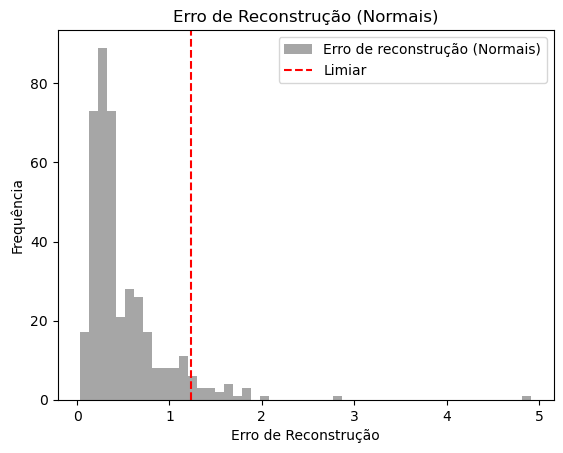

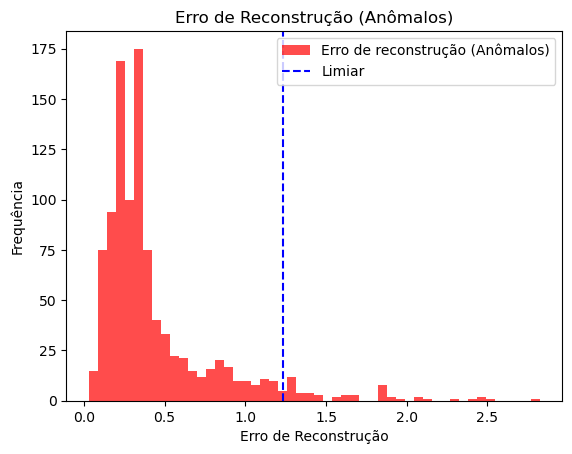

Número de anomalias detectadas nos dados normais: 21
Número de anomalias detectadas nos dados anômalos: 53


In [64]:
# Calcular o erro de reconstrução para os dados normais e anômalos
reconstruction_error = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)
reconstruction_error_anomalous = np.mean(np.power(anomalos_scaled - autoencoder.predict(anomalos_scaled), 2), axis=1)

# Definir o limiar com base no erro de reconstrução dos dados normais
threshold = np.percentile(reconstruction_error, 95)  # Ajuste o limiar conforme necessário

# Classificar como anômalo se o erro de reconstrução for maior que o limiar
y_pred_test = (reconstruction_error > threshold).astype(int)
y_pred_anomalous = (reconstruction_error_anomalous > threshold).astype(int)

# Visualizar o erro de reconstrução para normais
plt.hist(reconstruction_error, bins=50, color='gray', alpha=0.7, label="Erro de reconstrução (Normais)")
plt.axvline(x=threshold, color='red', linestyle='--', label="Limiar")
plt.legend()
plt.title("Erro de Reconstrução (Normais)")
plt.xlabel("Erro de Reconstrução")
plt.ylabel("Frequência")
plt.show()

# Visualizar o erro de reconstrução para anômalos
plt.hist(reconstruction_error_anomalous, bins=50, color='red', alpha=0.7, label="Erro de reconstrução (Anômalos)")
plt.axvline(x=threshold, color='blue', linestyle='--', label="Limiar")
plt.legend()
plt.title("Erro de Reconstrução (Anômalos)")
plt.xlabel("Erro de Reconstrução")
plt.ylabel("Frequência")
plt.show()

# Exibir as quantidades de anomalias detectadas
print(f"Número de anomalias detectadas nos dados normais: {np.sum(y_pred_test)}")
print(f"Número de anomalias detectadas nos dados anômalos: {np.sum(y_pred_anomalous)}")


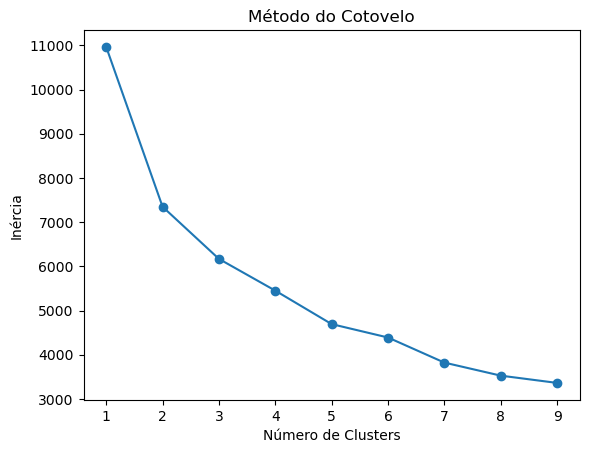

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.49      0.88      0.63      1013
     Anômalo       0.39      0.08      0.13      1004

    accuracy                           0.48      2017
   macro avg       0.44      0.48      0.38      2017
weighted avg       0.44      0.48      0.38      2017



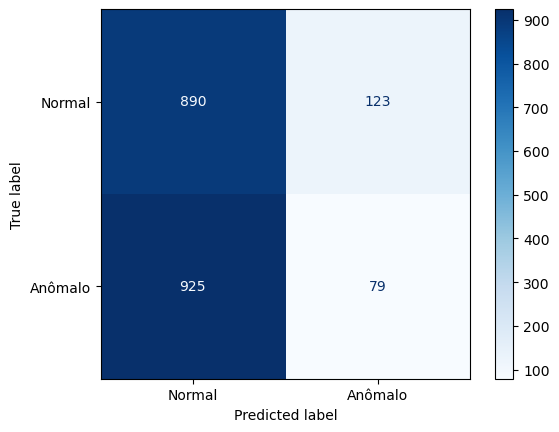

Métricas de Performance:
Silhouette Score: 0.3329861941715846
Calinski-Harabasz Score: 991.8621057744023
Threshold para anomalias: 2.692798912718963


In [65]:

#Kmeans

from imblearn.combine import SMOTEENN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    silhouette_score, calinski_harabasz_score
)

# Pré-processamento dos dados
X_scaled = X

# Função para calcular métricas do KMeans
def calculate_kmeans_metrics(X, labels):
    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    return silhouette, calinski

# Função para detectar anomalias
def detect_anomalies(X, centroids, labels, percentile=90):
    distances = np.linalg.norm(X - centroids[labels], axis=1)
    threshold = np.percentile(distances, percentile)
    anomalies = distances > threshold
    return anomalies.astype(int), threshold


# Determinar o número ideal de clusters (opcional)
# Método do cotovelo
inertia = []
for k in range(1, 10):
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans_temp.fit(X_scaled)
    inertia.append(kmeans_temp.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

# Configurando o K-Means com novos parâmetros
kmeans = KMeans(
    n_clusters=2,         # Número de clusters
    init="k-means++",     # Inicialização inteligente
    max_iter=500,         # Número máximo de iterações
    n_init=10,            # Número de inicializações
    random_state=42,      # Semente aleatória
    tol=1e-5,             # Tolerância para convergência
    algorithm="elkan"     # Algoritmo eficiente
)

# Treinamento do K-Means
labels = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# Métricas do K-Means
silhouette, calinski = calculate_kmeans_metrics(X_scaled, labels)

# Salvar resultados de performance
performance_results = {
    "K-Means": {
        "Silhouette Score": silhouette,
        "Calinski-Harabasz Score": calinski
    }
}

# Detectar anomalias
y_pred, threshold = detect_anomalies(X_scaled, centroids, labels, percentile=90)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y, y_pred, target_names=["Normal", "Anômalo"]))

# Matriz de Confusão
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

# Exibir métricas de performance
print("Métricas de Performance:")
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski)
print("Threshold para anomalias:", threshold)





Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.49      0.88      0.63       631
     Anômalo       0.43      0.09      0.14       647

    accuracy                           0.48      1278
   macro avg       0.46      0.48      0.38      1278
weighted avg       0.46      0.48      0.38      1278



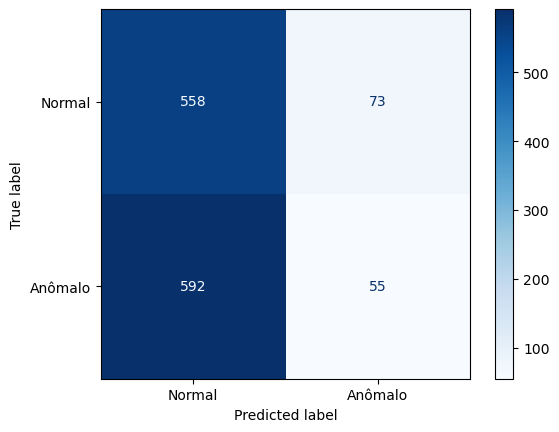

Métricas de Performance:
Silhouette Score: 0.3822779644209892
Calinski-Harabasz Score: 568.0610704768501
Threshold para anomalias: 2.6444411869480464


In [66]:
#K-Means balanceado


# Treinamento do K-Means com os dados reamostrados
labels = kmeans.fit_predict(X_resampled)
centroids = kmeans.cluster_centers_

# Métricas do K-Means
silhouette, calinski = calculate_kmeans_metrics(X_resampled, labels)

# Detectar anomalias
y_pred, threshold = detect_anomalies(X_resampled, centroids, labels, percentile=90)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_resampled, y_pred, target_names=["Normal", "Anômalo"]))

# Matriz de Confusão
cm = confusion_matrix(y_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

# Exibir métricas de performance
print("Métricas de Performance:")
print("Silhouette Score:", silhouette)
print("Calinski-Harabasz Score:", calinski)
print("Threshold para anomalias:", threshold)

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.60      0.06      0.11      1013
     Anômalo       0.50      0.96      0.66      1004

    accuracy                           0.51      2017
   macro avg       0.55      0.51      0.38      2017
weighted avg       0.55      0.51      0.38      2017



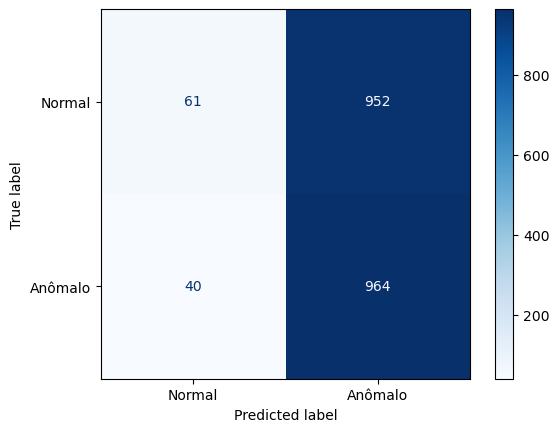

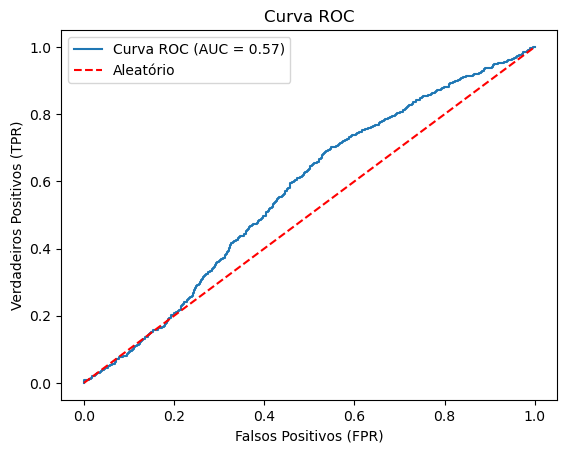

In [67]:
#IsolationForest sem balanceamento de dados

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X_scaled = X
y_true = y

# Treinamento com ajuste de contaminação
model = IsolationForest(contamination=0.05, max_features=0.5, max_samples=0.5, n_estimators=100)

model.fit(X_scaled)

# Previsões
y_pred = model.predict(X_scaled)
y_pred_adjusted = np.where(y_pred == -1, 0, 1)

# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, model.decision_function(X_scaled))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label='Aleatório')
plt.title('Curva ROC')
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()



Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.50      0.05      0.09       631
     Anômalo       0.51      0.95      0.66       647

    accuracy                           0.51      1278
   macro avg       0.50      0.50      0.38      1278
weighted avg       0.50      0.51      0.38      1278



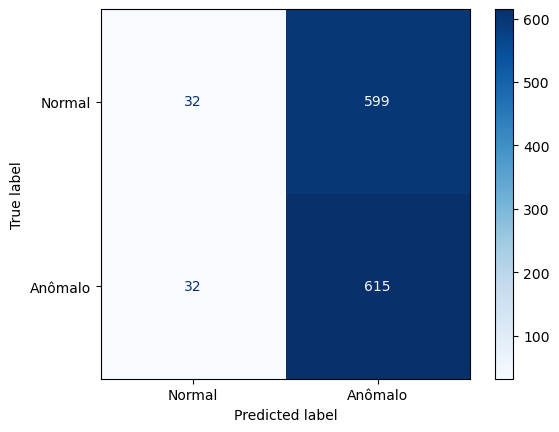

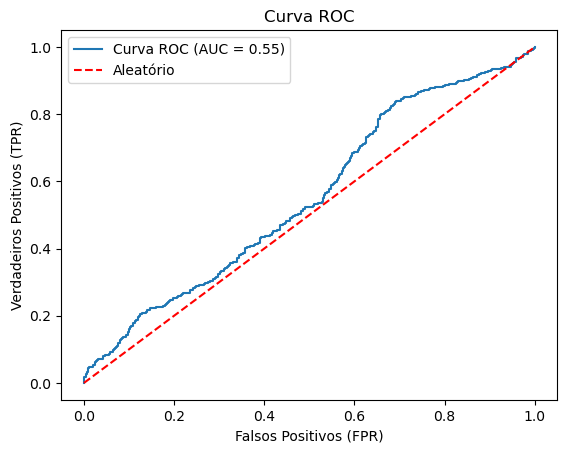

In [68]:
#IsolationForest com balanceamento de dados

from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

y_true = y_resampled
X_scaled = X_resampled

# Treinamento com ajuste de contaminação
model = IsolationForest(contamination=0.05, max_features=0.5, max_samples=0.5, n_estimators=100)

model.fit(X_scaled)

# Previsões
y_pred = model.predict(X_scaled)
y_pred_adjusted = np.where(y_pred == -1, 0, 1)


# Avaliação
print("Relatório de Classificação:")
print(classification_report(y_true, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de Confusão
cm = confusion_matrix(y_true, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true, model.decision_function(X_scaled))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label='Aleatório')
plt.title('Curva ROC')
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()


Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.50      0.99      0.67      1013
     Anômalo       0.57      0.02      0.03      1004

    accuracy                           0.50      2017
   macro avg       0.54      0.50      0.35      2017
weighted avg       0.54      0.50      0.35      2017



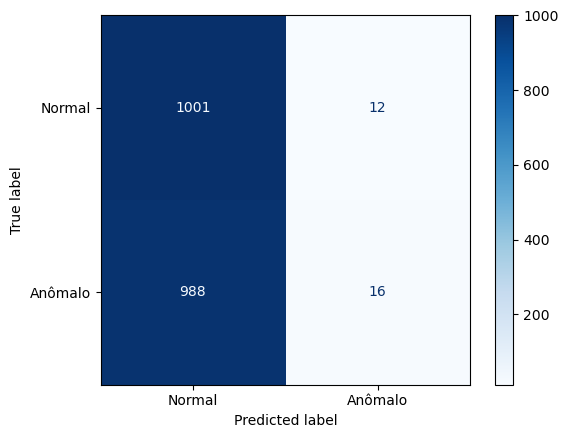

In [69]:
# modelo One-Class SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

""" param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.2],
    'gamma': ['auto', 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(OneClassSVM(kernel='rbf'), param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_scaled)

print("Melhores parâmetros:", grid_search.best_params_)
ocsvm = grid_search.best_estimator_"""

#Melhores parâmetros: {'gamma': 'auto', 'nu': 0.01}
# Inicializar o modelo One-Class SVM
# O parâmetro nu controla a fração esperada de anomalias (entre 0 e 1)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)  # Ajuste gamma e nu conforme necessário

#ocsvm = OneClassSVM(kernel='linear', nu=0.1)
#ocsvm = OneClassSVM(kernel='poly', degree=3, nu=0.1)

# Treinar o modelo
ocsvm.fit(X)

# Prever as anomalias: -1 = anômalos, 1 = normais
y_pred = ocsvm.predict(X)

# Ajustar os valores de y_pred para comparação com y_true
y_pred_adjusted = np.where(y_pred == 1, 0, 1)  # 0 = normais, 1 = anômalos

# Comparar com os rótulos verdadeiros (y_true)
print("Relatório de Classificação:")
print(classification_report(y, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()




Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.49      0.98      0.65       631
     Anômalo       0.40      0.02      0.03       647

    accuracy                           0.49      1278
   macro avg       0.45      0.50      0.34      1278
weighted avg       0.45      0.49      0.34      1278



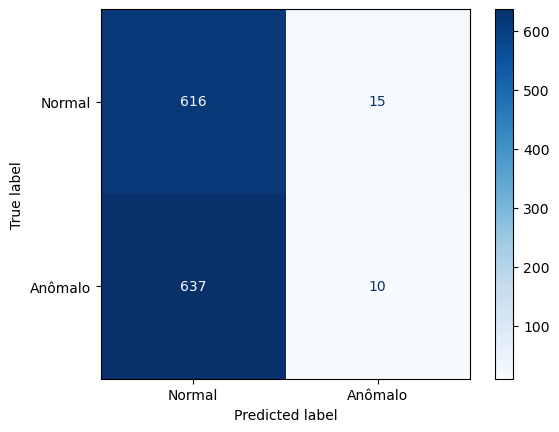

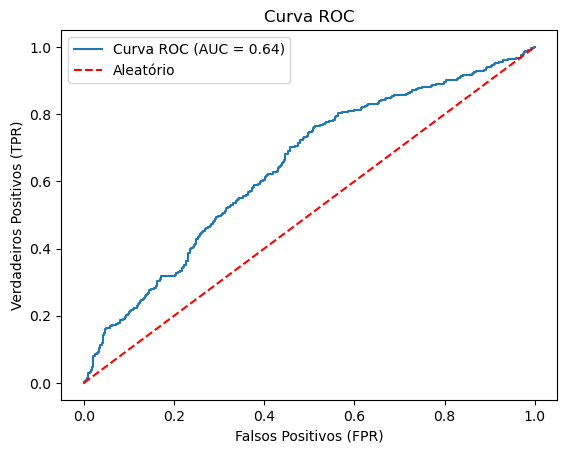

In [70]:
# modelo One-Class SVM com balanceamento

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

y = y_resampled
X = X_resampled
""" param_grid = {
    'nu': [0.01, 0.05, 0.1, 0.2],
    'gamma': ['auto', 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(OneClassSVM(kernel='rbf'), param_grid, cv=3, scoring='f1_macro')
grid_search.fit(X_scaled)

print("Melhores parâmetros:", grid_search.best_params_)
ocsvm = grid_search.best_estimator_"""

#Melhores parâmetros: {'gamma': 'auto', 'nu': 0.01}
# Inicializar o modelo One-Class SVM
# O parâmetro nu controla a fração esperada de anomalias (entre 0 e 1)
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)  # Ajuste gamma e nu conforme necessário

#ocsvm = OneClassSVM(kernel='linear', nu=0.1)
#ocsvm = OneClassSVM(kernel='poly', degree=3, nu=0.1)

# Treinar o modelo
ocsvm.fit(X)

# Prever as anomalias: -1 = anômalos, 1 = normais
y_pred = ocsvm.predict(X)

# Ajustar os valores de y_pred para comparação com y_true
y_pred_adjusted = np.where(y_pred == 1, 0, 1)  # 0 = normais, 1 = anômalos

# Comparar com os rótulos verdadeiros (y_true)
print("Relatório de Classificação:")
print(classification_report(y, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()



fpr, tpr, thresholds = roc_curve(y, ocsvm.decision_function(X))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"Curva ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'r--', label='Aleatório')
plt.title('Curva ROC')
plt.xlabel('Falsos Positivos (FPR)')
plt.ylabel('Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()


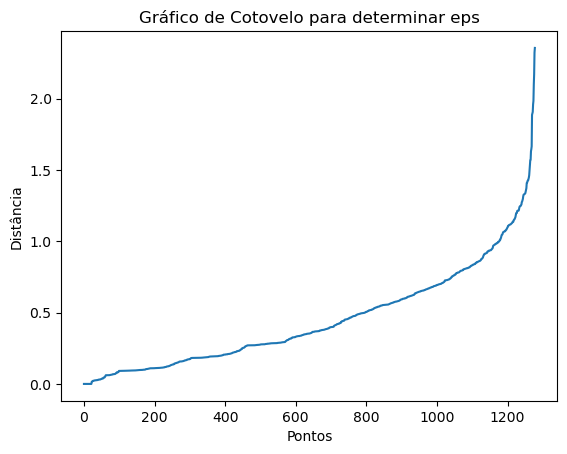

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.48      0.75      0.59       631
     Anômalo       0.47      0.22      0.30       647

    accuracy                           0.48      1278
   macro avg       0.48      0.48      0.44      1278
weighted avg       0.48      0.48      0.44      1278



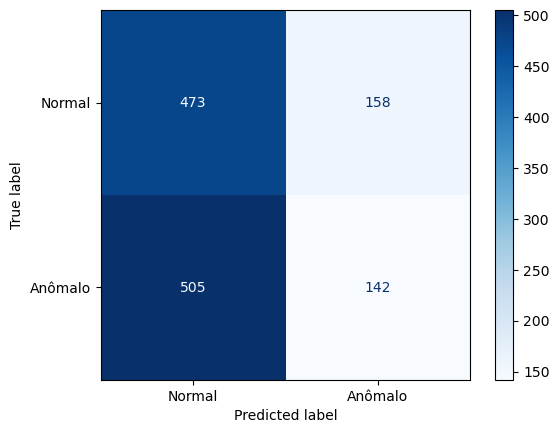

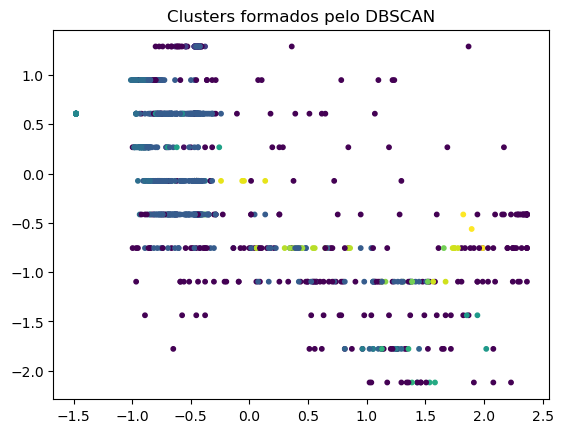

Número de registros originais: 1278
Número de registros classificados: 1278


In [71]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4], axis=0)  # 4 = min_samples - 1
plt.plot(distances)
plt.title('Gráfico de Cotovelo para determinar eps')
plt.xlabel('Pontos')
plt.ylabel('Distância')
plt.show()

# Inicializar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)

# Ajustar o modelo e prever os clusters
dbscan_labels = dbscan.fit_predict(X)

# Prever as anomalias: -1 = anômalos
y_pred_adjusted = np.where(dbscan_labels == -1, 1, 0)  # 1 = anômalos, 0 = normais

# Comparar com os rótulos verdadeiros (y_true)
print("Relatório de Classificação:")
print(classification_report(y, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

# Visualização dos clusters (opcional)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("Clusters formados pelo DBSCAN")
plt.show()

# Verificando o número de pontos antes e depois
print(f"Número de registros originais: {len(X)}")
print(f"Número de registros classificados: {len(dbscan.labels_)}")  # Deve ser o mesmo

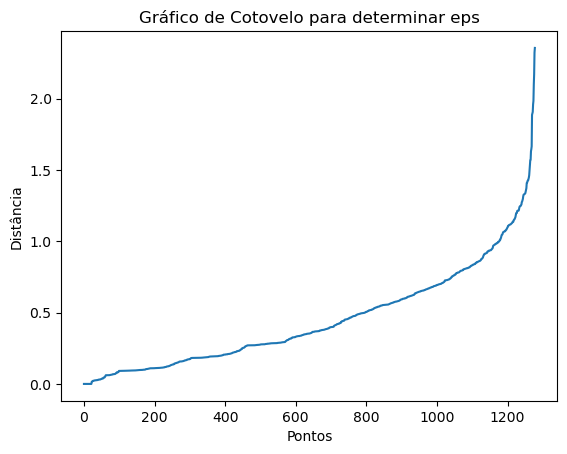

Relatório de Classificação:
              precision    recall  f1-score   support

      Normal       0.48      0.75      0.59       631
     Anômalo       0.47      0.22      0.30       647

    accuracy                           0.48      1278
   macro avg       0.48      0.48      0.44      1278
weighted avg       0.48      0.48      0.44      1278



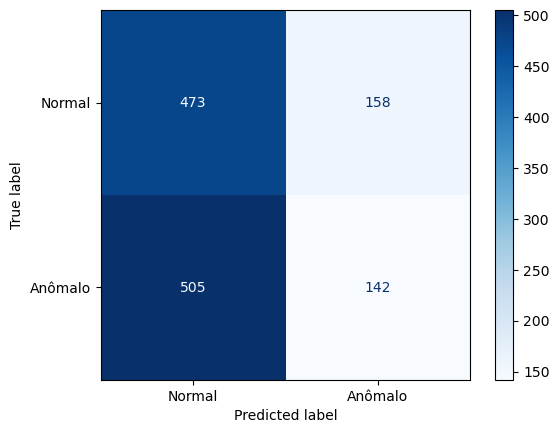

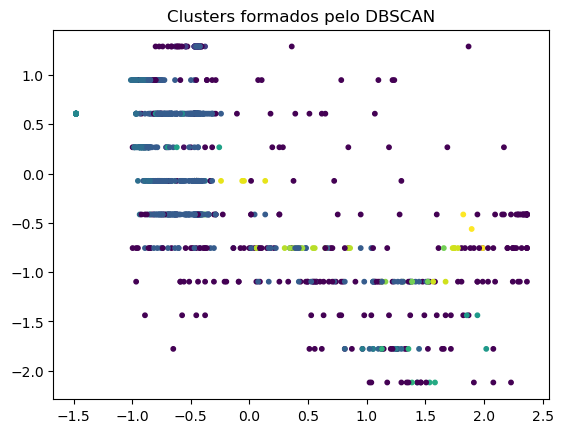

In [72]:
#DBSCAN com balanceamento

from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN

y = y_resampled
X = X_resampled

from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4], axis=0)  # 4 = min_samples - 1
plt.plot(distances)
plt.title('Gráfico de Cotovelo para determinar eps')
plt.xlabel('Pontos')
plt.ylabel('Distância')
plt.show()

# Ajuste do DBSCAN
dbscan = DBSCAN(eps=.5, min_samples=3,  metric='euclidean')  # Ajuste eps e min_samples
dbscan_labels = dbscan.fit_predict(X)  # Usar X_pca para clusters em 2D (ou X_scaled para todas as features)

# Ajustar as previsões: -1 = anômalos, 1 = normais
y_pred_adjusted = np.where(dbscan_labels == -1, 1, 0)  # 1 = anômalos, 0 = normais

# Avaliar o desempenho
print("Relatório de Classificação:")
print(classification_report(y, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

# Visualização dos clusters (opcional)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("Clusters formados pelo DBSCAN")
plt.show()


In [54]:
#DBSCAN para determinar hiperparamentros

from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from hdbscan import HDBSCAN



from sklearn.cluster import DBSCAN

# Testando valores diferentes de eps e min_samples
best_eps = None
best_min_samples = None
best_f1 = 0

for eps in np.arange(0.1, 3.0, 0.1):
    for min_samples in range(3, 15):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        dbscan_labels = dbscan.fit_predict(X_resampled)
        y_pred_adjusted = np.where(dbscan_labels == -1, 1, 0)
        
        report = classification_report(y_resampled, y_pred_adjusted, output_dict=True)
        f1_score = report['weighted avg']['f1-score']
        
        if f1_score > best_f1:
            best_f1 = f1_score
            best_eps = eps
            best_min_samples = min_samples

print(f"Melhor eps: {best_eps}, Melhor min_samples: {best_min_samples}, Melhor F1-Score: {best_f1}")



"""
y = y_resampled
X = X_resampled

from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

distances = np.sort(distances[:, 4], axis=0)  # 4 = min_samples - 1
plt.plot(distances)
plt.title('Gráfico de Cotovelo para determinar eps')
plt.xlabel('Pontos')
plt.ylabel('Distância')
plt.show()


hdbscan = HDBSCAN(min_samples=3, min_cluster_size=5)
hdbscan_labels = hdbscan.fit_predict(X)

# Ajuste do DBSCAN
dbscan = DBSCAN(eps=.5, min_samples=3,  metric='euclidean')  # Ajuste eps e min_samples
dbscan_labels = dbscan.fit_predict(X)  # Usar X_pca para clusters em 2D (ou X_scaled para todas as features)

FEATURE SELECTION.ipynb"


# Ajustar as previsões: -1 = anômalos, 1 = normais
y_pred_adjusted = np.where(hdbscan_labels == -1, 1, 0)  # 1 = anômalos, 0 = normais

# Avaliar o desempenho
print("Relatório de Classificação:")
print(classification_report(y, y_pred_adjusted, target_names=["Normal", "Anômalo"]))

# Matriz de confusão
cm = confusion_matrix(y, y_pred_adjusted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anômalo"])
disp.plot(cmap='Blues')
plt.show()

# Visualização dos clusters (opcional)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', s=10)
plt.title("Clusters formados pelo DBSCAN")
plt.show()"""


Melhor eps: 0.5, Melhor min_samples: 3, Melhor F1-Score: 0.6887387274927338


'\ny = y_resampled\nX = X_resampled\n\nfrom sklearn.neighbors import NearestNeighbors\nneighbors = NearestNeighbors(n_neighbors=5)\nneighbors_fit = neighbors.fit(X)\ndistances, indices = neighbors_fit.kneighbors(X)\n\ndistances = np.sort(distances[:, 4], axis=0)  # 4 = min_samples - 1\nplt.plot(distances)\nplt.title(\'Gráfico de Cotovelo para determinar eps\')\nplt.xlabel(\'Pontos\')\nplt.ylabel(\'Distância\')\nplt.show()\n\n\nhdbscan = HDBSCAN(min_samples=3, min_cluster_size=5)\nhdbscan_labels = hdbscan.fit_predict(X)\n\n# Ajuste do DBSCAN\ndbscan = DBSCAN(eps=.5, min_samples=3,  metric=\'euclidean\')  # Ajuste eps e min_samples\ndbscan_labels = dbscan.fit_predict(X)  # Usar X_pca para clusters em 2D (ou X_scaled para todas as features)\n\nFEATURE SELECTION.ipynb"\n\n\n# Ajustar as previsões: -1 = anômalos, 1 = normais\ny_pred_adjusted = np.where(hdbscan_labels == -1, 1, 0)  # 1 = anômalos, 0 = normais\n\n# Avaliar o desempenho\nprint("Relatório de Classificação:")\nprint(classificati